# Data from the Web - ADA 2019 Tutorial

#### What do you find in this Notebook?

The purpose of the Notebook is to offer a **quick** overview on how to scrape a Web page. In details, we illustrate the two main libraries used for this purpose. Afterwords, we show how to retrieve data from the Web.

## Web scraping libraries

To fetch data from the Web with Python, you need to get use to two essential libraries:

 * [`Requests (HTTP)`](https://requests.kennethreitz.org/en/master/): get the `html` page to parse.

 * [`Beautiful Soup (HTML Parsing)`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/): parse the `html` and extract data.

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup

If you have an error about missing modules, try this:
```
conda install requests
conda install beautifulsoup4
```

### Make a `get` request

The [GET method](https://en.wikipedia.org/wiki/Hypertext_Transfer_Protocol#Request_methods) retrieves information from the server.

We start scraping this website: https://httpbin.org/ - HTTP Request & Response Service. The website offers some useful endpoints [1] to check the content of our request. Some of them provide an 'echo service' that reply with the request received.

[1] Endpoint is a web address (URL) at which clients of a specific service can gain access to it. By referencing that URL, clients can get to operations provided by that service.

#### Example 1: Get request basics
Here we show an example on how use a get request. In particular, you see that we can get different information about the response:

* The status code [2] which tells us whether everything is fine and if the request worked
* The headers
* Body of the response (typically HTML for webpages or JSON/XML for web services)

[2] Find the reminder of HTTP status codes [here](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes). Some typical codes are: **200 OK** (standard response for successful HTTP requests) and **404 Not Found** (the requested resource could not be found but may be available in the future).

**NOTE:** this is an echo service, what you see is what we sent to the server

In [2]:
# Make the request
r = requests.get('https://httpbin.org/ip') # /ip: Returns the requester's IP Address.

print('Response status code: {0}\n'.format(r.status_code))
print('Response headers: {0}\n'.format(r.headers))
print('Response body: {0}'.format(r.text))

Response status code: 200

Response headers: {'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Origin': '*', 'Content-Encoding': 'gzip', 'Content-Type': 'application/json', 'Date': 'Mon, 21 Oct 2019 12:46:42 GMT', 'Referrer-Policy': 'no-referrer-when-downgrade', 'Server': 'nginx', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'DENY', 'X-XSS-Protection': '1; mode=block', 'Content-Length': '58', 'Connection': 'keep-alive'}

Response body: {
  "origin": "128.179.166.222, 128.179.166.222"
}



#### Example 2: Parsing JSON string from the response

If the body of the response is a JSON string, Requests offers a convenient way to parse the text and get a Python dictionary.

Let's try to get the current time from here: http://worldtimeapi.org/api/timezone/Europe/Zurich – a simple web service that returns the local-time for a given timezone as either JSON (by default) or plain-text.

In [4]:
r = requests.get('http://worldtimeapi.org/api/timezone/Europe/Zurich')

print('Response body (parsed json):')
r.json()

Response body (parsed json):


{'week_number': 43,
 'utc_offset': '+02:00',
 'utc_datetime': '2019-10-21T13:02:20.693695+00:00',
 'unixtime': 1571662940,
 'timezone': 'Europe/Zurich',
 'raw_offset': 3600,
 'dst_until': '2019-10-27T01:00:00+00:00',
 'dst_offset': 3600,
 'dst_from': '2019-03-31T01:00:00+00:00',
 'dst': True,
 'day_of_year': 294,
 'day_of_week': 1,
 'datetime': '2019-10-21T15:02:20.693695+02:00',
 'client_ip': '128.179.166.222',
 'abbreviation': 'CEST'}

#### Example 3: Including parameters into get request

This time, the `url` has been slightly changed to include a parameter (key1).

Remember that the with the GET method the parameters are part of the URL.

In [5]:
r = requests.get('https://httpbin.org/get?key1=value1')
r.json()

{'args': {'key1': 'value1'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.21.0'},
 'origin': '128.179.166.222, 128.179.166.222',
 'url': 'https://httpbin.org/get?key1=value1'}

### Make a `post` request
The [POST method](https://en.wikipedia.org/wiki/POST_(HTTP)) requests that a web server accepts the data enclosed in the body of the request message, most likely for storing it.

A POST request can have the paramenters in the body. Let's how to do this with Requests library:

In [6]:
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.post('https://httpbin.org/post', data=payload)
r.json()

{'args': {},
 'data': '',
 'files': {},
 'form': {'key1': 'value1', 'key2': 'value2'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Content-Length': '23',
  'Content-Type': 'application/x-www-form-urlencoded',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.21.0'},
 'json': None,
 'origin': '128.179.166.222, 128.179.166.222',
 'url': 'https://httpbin.org/post'}

### Make a request and extract the Page Title!

* Send the request and get the `html`

In [9]:
# Send the request
r = requests.get('https://httpbin.org/html')
r.text[:400]

'<!DOCTYPE html>\n<html>\n  <head>\n  </head>\n  <body>\n      <h1>Herman Melville - Moby-Dick</h1>\n\n      <div>\n        <p>\n          Availing himself of the mild, summer-cool weather that now reigned in these latitudes, and in preparation for the peculiarly active pursuits shortly to be anticipated, Perth, the begrimed, blistered old blacksmith, had not removed his portable forge to the hold again, af'

* Thus, we start to use our beloved `BeautifulSoup` to parse the HTML and we get the header

In [12]:
# Extract the header
soup = BeautifulSoup(r.text, 'html.parser')
soup.h1

<h1>Herman Melville - Moby-Dick</h1>

## Let's get interesting data - DBLP

*DBLP is a computer science bibliography website. Starting in 1993 at the University of Trier, Germany, it grew from a small collection of HTML files and became an organization hosting a database and logic programming bibliography site. DBLP listed more than 3.66 million journal articles, conference papers, and other publications on computer science in July 2016, up from about 14,000 in 1995.*

<div align="right">https://en.wikipedia.org/wiki/DBLP</div> 

We want to check the distribution of the publications by year of the president of EPFL - Martin Vetterli.

First of all, let's check the page with the data we need:

In [13]:
URL = 'http://dblp.uni-trier.de/pers/hd/v/Vetterli:Martin'

The page is public and accessible with a browser using a simple GET:

In [14]:
r = requests.get(URL)
page_body = r.text

Now the page content is downloaded and we can inspect the body of the response:

In [15]:
page_body[:300]

'<!DOCTYPE html>\n<html lang="en">\n<head data-urlpt="v/Vetterli:Martin"><meta charset="UTF-8" /><title>dblp: Martin Vetterli</title><link href="https://dblp.org" rel="home" /><link rel="apple-touch-icon" type="image/png" sizes="192x192" href="https://dblp.uni-trier.de/img/dblp.icon.192x192.png"><link '

It is pure HTML, and we need BeautifulSoup to parse the content. We can specify the parser we want to use html.parser, lxml, lxml-xml, xml, html5lib. Each of them has advantages and disadvantages - see [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser).

In [16]:
soup = BeautifulSoup(page_body, 'html.parser')

Now the page is parsed and we can read the data we need!

For example, let's get the title! Are we in the right page?

In [17]:
soup.title

<title>dblp: Martin Vetterli</title>

Yes! And we can get the clean text without HTML tags:

In [18]:
soup.title.string

'dblp: Martin Vetterli'

A more complex query now! Let's find all the links in the page. 

In HTML a link is defined using the tag &lt;A&gt;, and BeautifulSoup offers an easy way to find them:

In [19]:
all_links = soup.find_all('a')
print('The webpage cointains {0} links...'.format(len(all_links)))

The webpage cointains 12286 links...


In [20]:
external_links = 0
for link in all_links:
    if(not link.get('href').startswith('http://dblp.uni-trier.de/')
       and link.get('href').startswith('http')):  # just an example, you need more checks
        external_links += 1

print('... and {0} of them point to external websites.'.format(external_links))

... and 11437 of them point to external websites.


Let's move on. Now we want to extract the sections that contain the publication details.

**The easiest way is to inspect the DOM of the web page with a browser.** Check with your browser how to isolate the portions of the page that represent publications. --- Task not in this Notebook ---

Ok, each row is composed by a &lt;li&gt; tag and has a class called 'entry':

In [21]:
publications_wrappers = soup.find_all('li', class_='entry')

Let's check the number of rows:

In [22]:
print('Total number of items: {0}'.format(len(publications_wrappers)))

Total number of items: 410


In [29]:
for p in publications_wrappers:
    print(p.find('span', class_='title').text)

Super Resolution Phase Retrieval for Sparse Signals.
On the Move: Localization with Kinetic Euclidean Distance Matrices.
Multi-channel Time Encoding for Improved Reconstruction of Bandlimited Signals.
Shapes from Echoes: Uniqueness from Point-to-Plane Distance Matrices.
Learning neural connectivity from firing activity: efficient algorithms with provable guarantees on topology.
Unlabeled Sensing With Random Linear Measurements.
Sampling Continuous-Time Sparse Signals: A Frequency-Domain Perspective.
Efficient Multidimensional Diracs Estimation With Linear Sample Complexity.
Sampling at Unknown Locations: Uniqueness and Reconstruction Under Constraints.
Combining Range and Direction for Improved Localization.
Structure from Sound with Incomplete Data.
Bound and Conquer: Improving Triangulation by Enforcing Consistency.
Super Resolution Phase Retrieval for Sparse Signals.
Handheld Reflectance Acquisition of Paintings.
Towards Generalized FRI Sampling With an Application to Source Resolut

Order-Optimal Consensus through Randomized Path Averaging.
Infrastructures for a Smart Earth - The Swiss NCCR-MICS initiative -.
Space-Frequency Quantization for Image Compression With Directionlets.
Sampling Moments and Reconstructing Signals of Finite Rate of Innovation: Shannon Meets Strang-Fix.
Super-Resolution From Unregistered and Totally Aliased Signals Using Subspace Methods.
A Stochastic Model for Video and its Information Rates.
The effective rank: A measure of effective dimensionality.
Efficient zerotree-based image compression with directionlets.
Experiences with Reproducible Research in Various Facets of Signal Processing Research.
Tomographic Approach for Parametric Estimation of Local Diffusive Sources and Application to Heat Diffusion.
Space-Frequency Quantization using Directionlets.
On the Information Rates of the Plenoptic Function.
A Frequency Domain Approach to Registration of Aliased Images with Application to Super-resolution.
Locally adaptive wavelet-based image

Wavelets and Subband Coding.
Simple algorithms for BCH decoding.
Discrete-time wavelet extrema representation: design and consistent reconstruction.
Nonseparable two- and three-dimensional wavelets.
Quantization of Overcomplete Expansions.
Groebner basis techniques in multidimensional multirate systems.
Resolution enhancement of images using wavelet transform extrema extrapolation.
Lossy compression of individual signals based on string matching and one pass codebook design.
Joint source/channel coding for multicast packet video.
Layered transmission of signals over power-constrained wireless channels.
Motion compensation of motion vectors.
Optimal trellis-based buffered compression and fast approximations.
Bit allocation for dependent quantization with applications to multiresolution and MPEG video coders.
Rate-distortion optimal fast thresholding with complete JPEG/MPEG decoder compatibility.
Reduction of the MSE in R-times oversampled A/D conversion O(1/R) to O(1/R2).
Deterministic 

In [26]:
import pandas as pd
%matplotlib inline

In [31]:
publications_list = []
for p in publications_wrappers:
    title = p.find('span', class_='title').text  # get the title
    authos_list = p.find_all('span', {'itemprop': 'author'})  # get the authors list
    authors = [author.text for author in authos_list]  
    year = p.find('span', {'itemprop': 'datePublished'}).text
    publications_list.append({'title': title, 
                         'authors': authors, 
                         'year': int(year)})  # here you should validate the data

publications = pd.DataFrame.from_dict(publications_list)
publications.head()

,authors,title,year
0,"[Gilles Baechler, Miranda Krekovic, Juri Ranie...",Super Resolution Phase Retrieval for Sparse Si...,2019
1,"[Puoya Tabaghi, Ivan Dokmanic, Martin Vetterli]",On the Move: Localization with Kinetic Euclide...,2019
2,"[Karen Adam, Adam Scholefield, Martin Vetterli]",Multi-channel Time Encoding for Improved Recon...,2019
3,"[Miranda Krekovic, Ivan Dokmanic, Martin Vette...",Shapes from Echoes: Uniqueness from Point-to-P...,2019
4,"[Amin Karbasi, Amir Hesam Salavati, Martin Vet...",Learning neural connectivity from firing activ...,2018


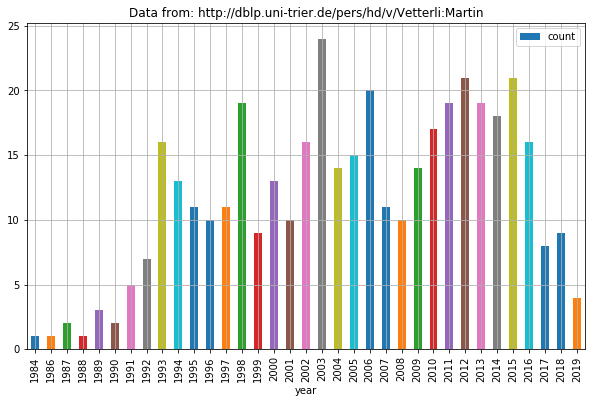

In [32]:
publications.groupby('year')\
    .count()\
    .rename(columns = {'title':'count'})\
    .plot(y='count', kind='bar', grid=True, figsize=(10, 6), title='Data from: ' + URL)